/var/folders/_x/j976w76s3d57ycwxdqspwd9m0000gn/T/ipykernel_9081/2048815625.py:8: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True, errors='coerce')


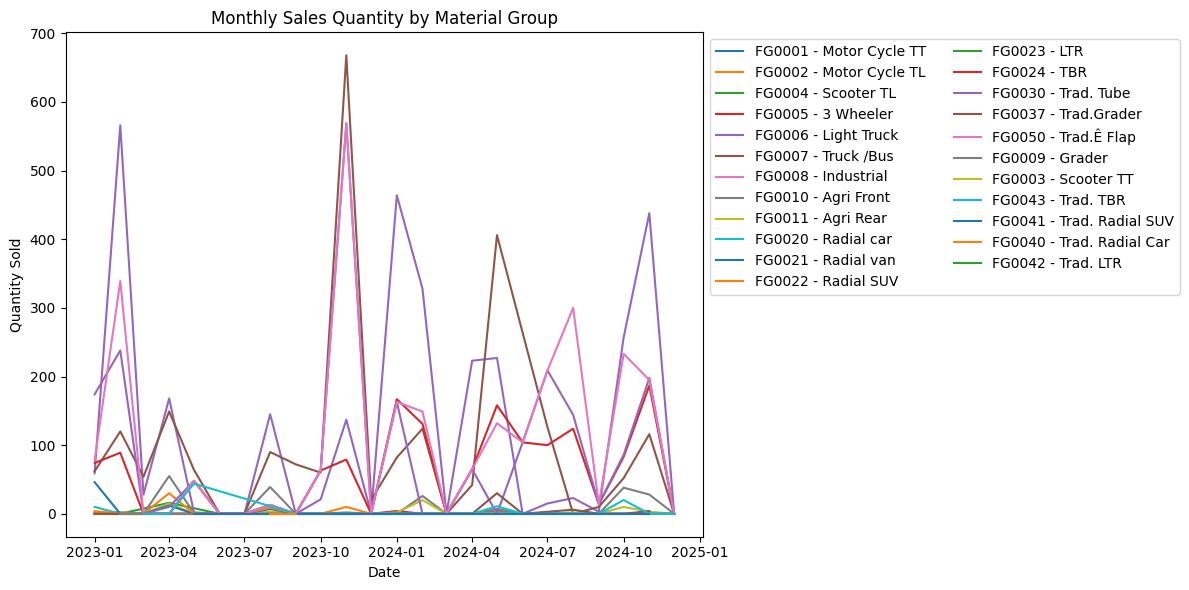

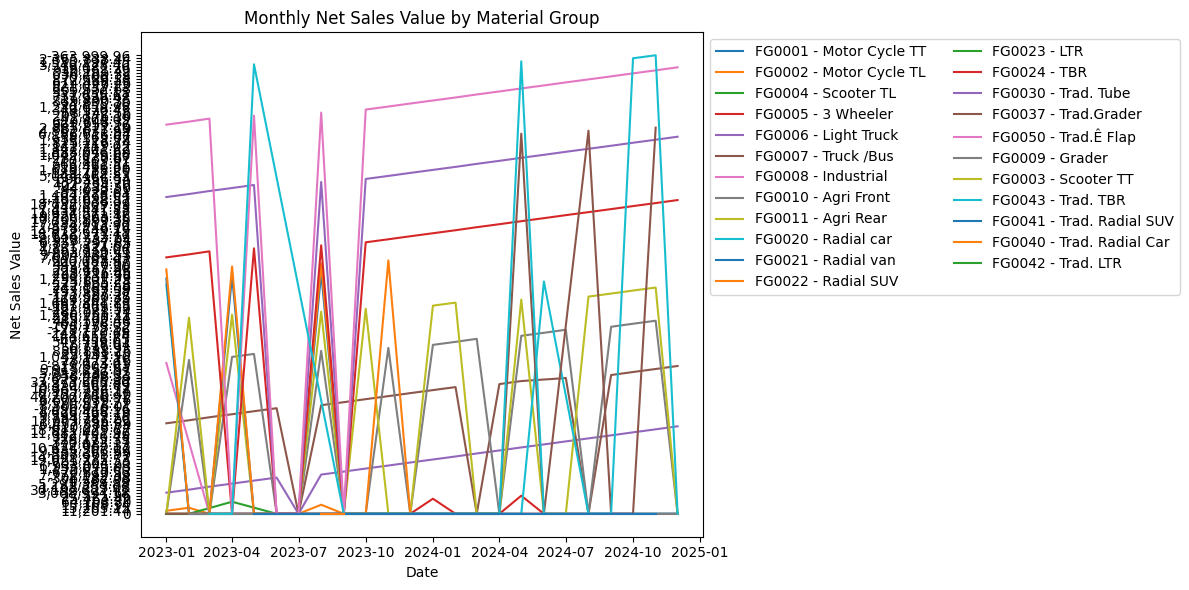

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/Users/jaygamage/Downloads/salesdata2324.csv", encoding='latin1')

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True, errors='coerce')

# Drop rows with invalid dates
df.dropna(subset=['Date'], inplace=True)

# Extract Year, Month, and Quarter
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter

# Fill missing values with 0
df.fillna(0, inplace=True)

# Set negative 'Quantity' to 0 (assuming sales cannot be negative)
df['Quantity'] = df['Quantity'].apply(lambda x: max(x, 0))

# Grouping by date and material group for total monthly sales
monthly_sales = df.groupby(['Year', 'Month', 'Material Group']).agg({'Quantity': 'sum', 'Net Value': 'sum'}).reset_index()

# Create a 'Month-Year' column for plotting
monthly_sales['Month-Year'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(DAY=1))

# Plot 1: Sales Quantity Trend by Material Group
plt.figure(figsize=(12, 6))
for material_group in monthly_sales['Material Group'].unique():
    subset = monthly_sales[monthly_sales['Material Group'] == material_group]
    plt.plot(subset['Month-Year'], subset['Quantity'], label=material_group)

plt.title('Monthly Sales Quantity by Material Group')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=2)
plt.tight_layout()
plt.show()

# Plot 2: Net Sales Value Trend by Material Group
plt.figure(figsize=(12, 6))
for material_group in monthly_sales['Material Group'].unique():
    subset = monthly_sales[monthly_sales['Material Group'] == material_group]
    plt.plot(subset['Month-Year'], subset['Net Value'], label=material_group)

plt.title('Monthly Net Sales Value by Material Group')
plt.xlabel('Date')
plt.ylabel('Net Sales Value')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=2)
plt.tight_layout()
plt.show()

/var/folders/_x/j976w76s3d57ycwxdqspwd9m0000gn/T/ipykernel_9081/1508985804.py:11: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True, errors='coerce')
/var/folders/_x/j976w76s3d57ycwxdqspwd9m0000gn/T/ipykernel_9081/1508985804.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales_series = monthly_sales['Quantity'].resample('M').sum()
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.f

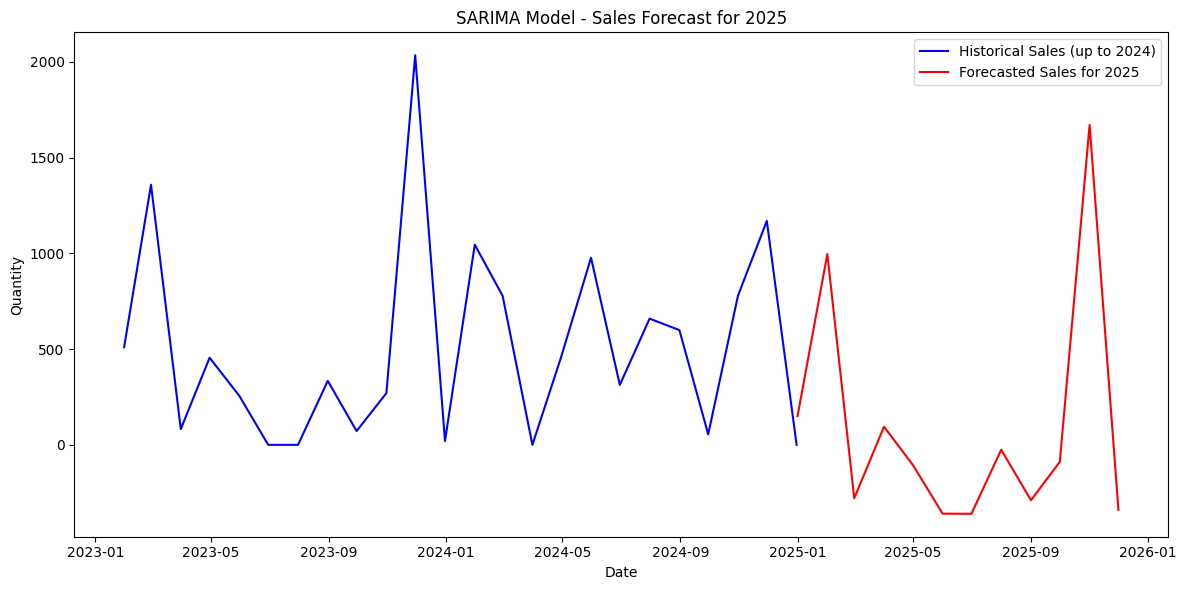

Forecasted Sales for 2025:
2025-01-01     150.331413
2025-02-01     996.122065
2025-03-01    -278.933678
2025-04-01      94.766414
2025-05-01    -104.802677
2025-06-01    -359.217983
2025-07-01    -359.997173
2025-08-01     -25.376732
2025-09-01    -289.370475
2025-10-01     -88.682423
2025-11-01    1670.187887
2025-12-01    -339.408966
Freq: MS, Name: predicted_mean, dtype: float64


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error

# Load dataset
df = pd.read_csv("/Users/jaygamage/Downloads/salesdata2324.csv", encoding='latin1')

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True, errors='coerce')

# Drop rows with invalid dates
df.dropna(subset=['Date'], inplace=True)

# Extract Year, Month, and Quarter
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter

# Fill missing values with 0
df.fillna(0, inplace=True)

# Set negative 'Quantity' to 0 (assuming sales cannot be negative)
df['Quantity'] = df['Quantity'].apply(lambda x: max(x, 0))

# Grouping by date and material group for total monthly sales
monthly_sales = df.groupby(['Year', 'Month']).agg({'Quantity': 'sum'}).reset_index()

# Create a 'Month-Year' column for plotting and set as index
monthly_sales['Month-Year'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(DAY=1))
monthly_sales.set_index('Month-Year', inplace=True)

# Grouping by month and summing quantities for time series
monthly_sales_series = monthly_sales['Quantity'].resample('M').sum()

# Train on the entire data for prediction
sarima_model = SARIMAX(monthly_sales_series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit(disp=False)

# Forecast for 2025 (12 months)
forecast_steps = 12  # Forecasting for 12 months (January to December 2025)
forecast_2025 = sarima_fit.forecast(steps=forecast_steps)

# Create datetime index for 2025
forecast_2025_index = pd.date_range(start='2025-01-01', end='2025-12-01', freq='MS')
forecast_2025.index = forecast_2025_index

# Plot Actual Data + Forecast
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales_series, label='Historical Sales (up to 2024)', color='blue')
plt.plot(forecast_2025, label='Forecasted Sales for 2025', color='red')
plt.title('SARIMA Model - Sales Forecast for 2025')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.tight_layout()
plt.show()

# Print forecasted sales for each month in 2025
print("Forecasted Sales for 2025:")
print(forecast_2025)

/var/folders/_x/j976w76s3d57ycwxdqspwd9m0000gn/T/ipykernel_9081/853999369.py:10: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True, errors='coerce')
/var/folders/_x/j976w76s3d57ycwxdqspwd9m0000gn/T/ipykernel_9081/853999369.py:30: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales_series = monthly_sales['Quantity'].resample('M').sum()
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting p

Mean Absolute Error (MAE): 517.83
Mean Squared Error (MSE): 341875.58
Root Mean Squared Error (RMSE): 584.70
Accuracy: 9.07%
F1 Score: 0.00


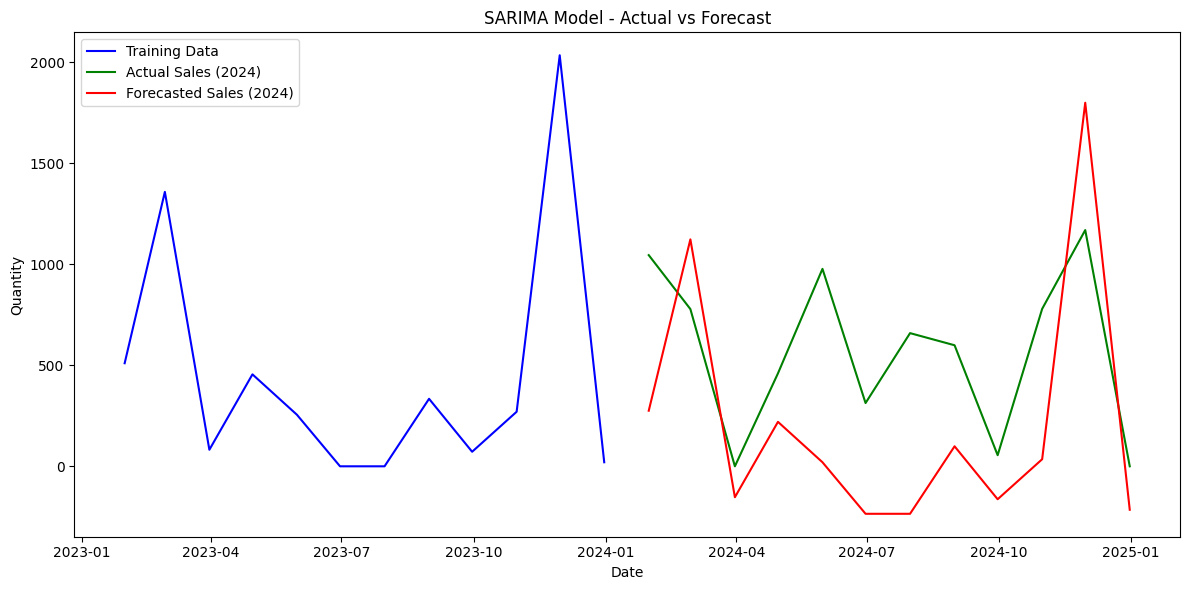

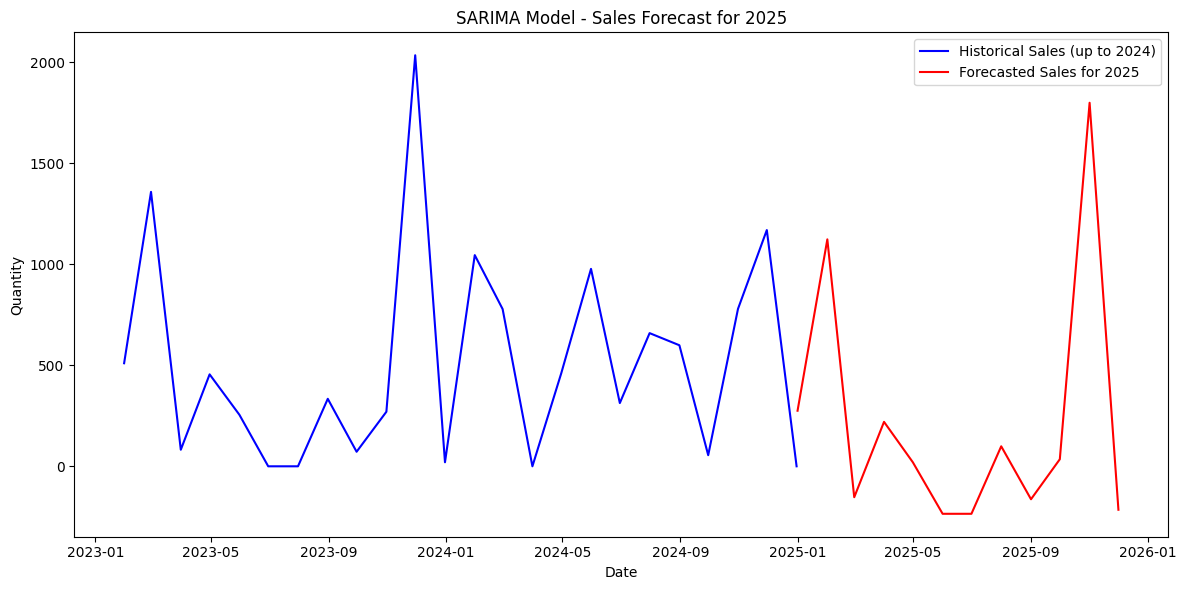

Forecasted Sales for 2025:
2025-01-01     275.000127
2025-02-01    1123.000127
2025-03-01    -152.999873
2025-04-01     220.000127
2025-05-01      20.000127
2025-06-01    -234.999873
2025-07-01    -234.999873
2025-08-01      99.000127
2025-09-01    -162.999873
2025-10-01      35.000127
2025-11-01    1799.000127
2025-12-01    -214.999873
Freq: MS, Name: predicted_mean, dtype: float64


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, f1_score

# Load dataset
df = pd.read_csv("/Users/jaygamage/Downloads/salesdata2324.csv", encoding='latin1')

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True, errors='coerce')
df.dropna(subset=['Date'], inplace=True)

# Extract Year, Month, and Quarter
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter

# Fill missing values with 0
df.fillna(0, inplace=True)

# Set negative 'Quantity' to 0
df['Quantity'] = df['Quantity'].apply(lambda x: max(x, 0))

# Grouping for monthly sales
monthly_sales = df.groupby(['Year', 'Month']).agg({'Quantity': 'sum'}).reset_index()
monthly_sales['Month-Year'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(DAY=1))
monthly_sales.set_index('Month-Year', inplace=True)

# Resampling for time series data
monthly_sales_series = monthly_sales['Quantity'].resample('M').sum()

# Train-test split (train: all except last 12 months, test: last 12 months of 2024)
train_data = monthly_sales_series[:-12]
test_data = monthly_sales_series[-12:]

# SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima_model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit(disp=False)

# Forecast for 12 months
forecast_2024 = sarima_fit.forecast(steps=12)
forecast_2024.index = test_data.index

# Metrics
mae = mean_absolute_error(test_data, forecast_2024)
mse = mean_squared_error(test_data, forecast_2024)
rmse = np.sqrt(mse)
accuracy = 1 - (mae / test_data.mean())

# F1 Score (binary threshold for closeness: true if prediction within 10% of actual sales)
threshold = 0.1  # 10% margin
actual_binary = (test_data > 0).astype(int)
predicted_binary = ((np.abs(test_data - forecast_2024) / test_data) < threshold).astype(int)
f1 = f1_score(actual_binary, predicted_binary, average='binary')

# Output Metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"F1 Score: {f1:.2f}")

# Plot Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data', color='blue')
plt.plot(test_data, label='Actual Sales (2024)', color='green')
plt.plot(forecast_2024, label='Forecasted Sales (2024)', color='red')
plt.title('SARIMA Model - Actual vs Forecast')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.tight_layout()
plt.show()

# Forecast for 2025
forecast_2025 = sarima_fit.forecast(steps=12)
forecast_2025_index = pd.date_range(start='2025-01-01', end='2025-12-01', freq='MS')
forecast_2025.index = forecast_2025_index

# Plot Forecast for 2025
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales_series, label='Historical Sales (up to 2024)', color='blue')
plt.plot(forecast_2025, label='Forecasted Sales for 2025', color='red')
plt.title('SARIMA Model - Sales Forecast for 2025')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.tight_layout()
plt.show()

# Print forecast for 2025
print("Forecasted Sales for 2025:")
print(forecast_2025)

/var/folders/_x/j976w76s3d57ycwxdqspwd9m0000gn/T/ipykernel_9081/1244120967.py:11: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True, errors='coerce')
/var/folders/_x/j976w76s3d57ycwxdqspwd9m0000gn/T/ipykernel_9081/1244120967.py:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales_series = monthly_sales['Quantity'].resample('M').sum()
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.f

Mean Absolute Error (MAE): 492.66
Mean Squared Error (MSE): 411918.18
Root Mean Squared Error (RMSE): 641.81
Accuracy: 5.33%
F1 Score: 0.40


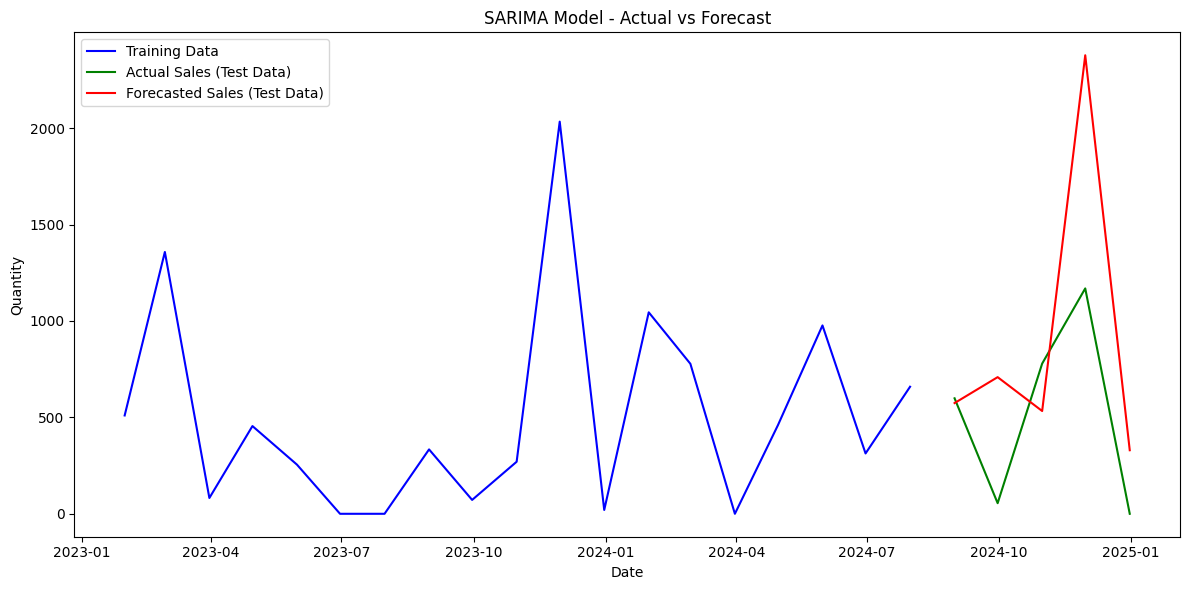

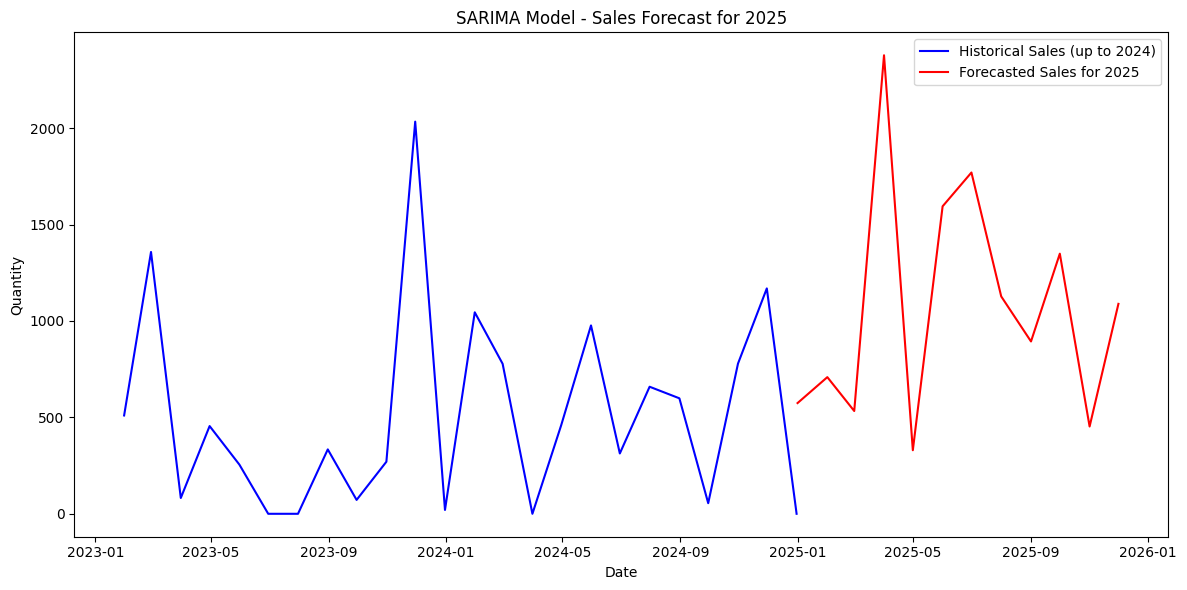

Forecasted Sales for 2025:
2025-01-01     574.321220
2025-02-01     708.765475
2025-03-01     533.104783
2025-04-01    2378.309277
2025-05-01     329.665284
2025-06-01    1594.907985
2025-07-01    1770.192883
2025-08-01    1127.508608
2025-09-01     893.869157
2025-10-01    1349.173214
2025-11-01     452.742146
2025-12-01    1088.923024
Freq: MS, Name: predicted_mean, dtype: float64


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, f1_score
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load dataset
df = pd.read_csv("/Users/jaygamage/Downloads/salesdata2324.csv", encoding='latin1')

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True, errors='coerce')
df.dropna(subset=['Date'], inplace=True)

# Extract Year, Month, and Quarter
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter

# Fill missing values with 0 and set negative quantities to 0
df.fillna(0, inplace=True)
df['Quantity'] = df['Quantity'].apply(lambda x: max(x, 0))

# Grouping data by month for time series
monthly_sales = df.groupby(['Year', 'Month']).agg({'Quantity': 'sum'}).reset_index()
monthly_sales['Month-Year'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(DAY=1))
monthly_sales.set_index('Month-Year', inplace=True)

# Resampling for time series data
monthly_sales_series = monthly_sales['Quantity'].resample('M').sum()

# Train-test split (80% train, 20% test)
split_index = int(len(monthly_sales_series) * 0.8)
train_data = monthly_sales_series[:split_index]
test_data = monthly_sales_series[split_index:]

# SARIMA Model
sarima_model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit(disp=False)

# Forecast for the length of the test set
forecast = sarima_fit.forecast(steps=len(test_data))
forecast.index = test_data.index

# Metrics
mae = mean_absolute_error(test_data, forecast)
mse = mean_squared_error(test_data, forecast)
rmse = np.sqrt(mse)
accuracy = 1 - (mae / test_data.mean())

# F1 Score (binary threshold for closeness: prediction within 10% of actual sales)
threshold = 0.1  # 10% margin
actual_binary = (test_data > 0).astype(int)
predicted_binary = ((np.abs(test_data - forecast) / test_data) < threshold).astype(int)
f1 = f1_score(actual_binary, predicted_binary, average='binary')

# Output metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"F1 Score: {f1:.2f}")

# Plot Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data', color='blue')
plt.plot(test_data, label='Actual Sales (Test Data)', color='green')
plt.plot(forecast, label='Forecasted Sales (Test Data)', color='red')
plt.title('SARIMA Model - Actual vs Forecast')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.tight_layout()
plt.show()

# Forecast for 2025
forecast_2025 = sarima_fit.forecast(steps=12)
forecast_2025_index = pd.date_range(start='2025-01-01', end='2025-12-01', freq='MS')
forecast_2025.index = forecast_2025_index

# Plot Forecast for 2025
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales_series, label='Historical Sales (up to 2024)', color='blue')
plt.plot(forecast_2025, label='Forecasted Sales for 2025', color='red')
plt.title('SARIMA Model - Sales Forecast for 2025')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.tight_layout()
plt.show()

# Print forecasted values for 2025
print("Forecasted Sales for 2025:")
print(forecast_2025)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Librar

Best SARIMA Parameters: (1, 0, 2, 1, 0, 0, 12)
Best MAE from Grid Search: 179.86
Mean Absolute Error (MAE): 179.86
Root Mean Squared Error (RMSE): 274.48
Accuracy: 65.44%


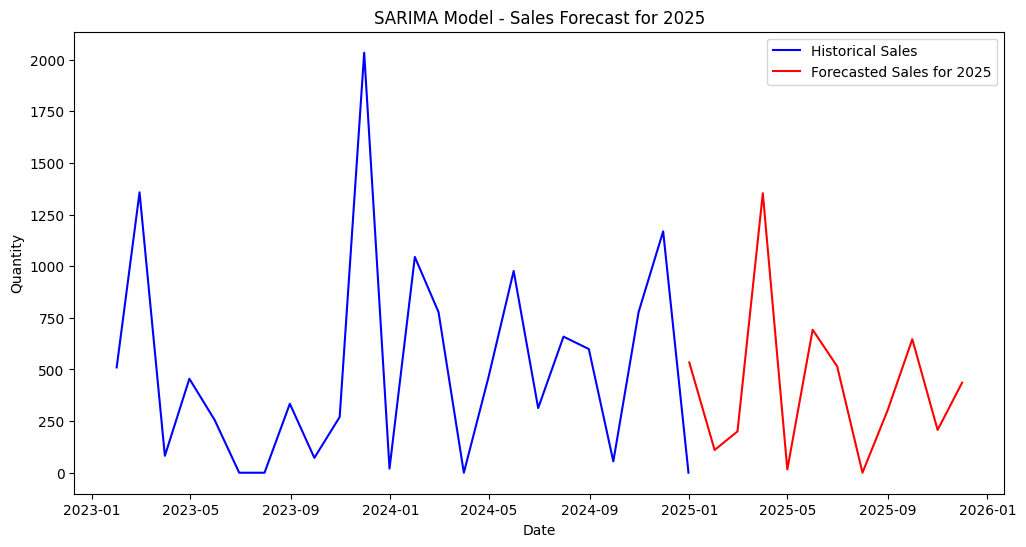

In [7]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error
import itertools

# Function to perform SARIMA Grid Search
def sarima_grid_search(train_data, test_data, p_vals, d_vals, q_vals, P_vals, D_vals, Q_vals, m):
    best_score = float('inf')
    best_params = None
    for p, d, q, P, D, Q in itertools.product(p_vals, d_vals, q_vals, P_vals, D_vals, Q_vals):
        try:
            sarima_model = SARIMAX(train_data, order=(p, d, q), seasonal_order=(P, D, Q, m))
            sarima_fit = sarima_model.fit(disp=False)
            forecast = sarima_fit.forecast(steps=len(test_data))
            mae = mean_absolute_error(test_data, forecast)
            if mae < best_score:
                best_score = mae
                best_params = (p, d, q, P, D, Q, m)
        except Exception as e:
            continue

    return best_params, best_score

# Define parameter ranges
p_vals = [0, 1, 2]
d_vals = [0, 1]
q_vals = [0, 1, 2]
P_vals = [0, 1]
D_vals = [0, 1]
Q_vals = [0, 1]
m = 12  # Monthly seasonality

# Perform Grid Search
best_params, best_mae = sarima_grid_search(train_data, test_data, p_vals, d_vals, q_vals, P_vals, D_vals, Q_vals, m)

print(f"Best SARIMA Parameters: {best_params}")
print(f"Best MAE from Grid Search: {best_mae:.2f}")

# Train SARIMA Model with Best Params
best_model = SARIMAX(train_data, order=best_params[:3], seasonal_order=best_params[3:])
sarima_fit = best_model.fit(disp=False)

# Forecast
forecast = sarima_fit.forecast(steps=len(test_data))
forecast.index = test_data.index

# Calculate accuracy and metrics
mae = mean_absolute_error(test_data, forecast)
mse = mean_squared_error(test_data, forecast)
rmse = np.sqrt(mse)
accuracy = 1 - (mae / test_data.mean())

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Accuracy: {accuracy * 100:.2f}%")

# Forecast 2025
forecast_2025 = sarima_fit.forecast(steps=12)
forecast_2025_index = pd.date_range(start='2025-01-01', end='2025-12-01', freq='MS')
forecast_2025.index = forecast_2025_index

# Plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales_series, label='Historical Sales', color='blue')
plt.plot(forecast_2025, label='Forecasted Sales for 2025', color='red')
plt.title('SARIMA Model - Sales Forecast for 2025')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()